**Задание 1.** Сгенерировать эксперимент, где бросается 10 кубиков и считается сумма выпавших очков на всех кубиках:

**Часть 1**

--Соберите выборку размера 20: Проведите эксперимент 20 раз. Каждый раз записывайте результат эксперимента.

--Постройте гистограмму плотности распределения

--Постройте график эмпирической плотность распределения

--Посчитайте точечную оценку мат. ожидания

--Посчитайте точечную оценку дисперсии

In [4]:
import random
import pandas as pd
import numpy as np

In [2]:
# Функция для одного эксперимента
def throw_10_dice():
    return sum(random.randint(1, 6) for m in range(10))

# Проводим 20 экспериментов
results = []
for i in range(20):
    total = throw_10_dice()
    results.append(total)
    print(f"Эксперимент {i+1:2d}: Сумма = {total}")

# Создаем таблицу с результатами
df = pd.DataFrame({
    'Эксперимент': range(1, 21),
    'Сумма очков': results
})

print("\n" + "="*50)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*50)
print(df.to_string(index=False))

Эксперимент  1: Сумма = 37
Эксперимент  2: Сумма = 25
Эксперимент  3: Сумма = 36
Эксперимент  4: Сумма = 40
Эксперимент  5: Сумма = 39
Эксперимент  6: Сумма = 36
Эксперимент  7: Сумма = 39
Эксперимент  8: Сумма = 48
Эксперимент  9: Сумма = 24
Эксперимент 10: Сумма = 34
Эксперимент 11: Сумма = 30
Эксперимент 12: Сумма = 32
Эксперимент 13: Сумма = 26
Эксперимент 14: Сумма = 35
Эксперимент 15: Сумма = 35
Эксперимент 16: Сумма = 32
Эксперимент 17: Сумма = 29
Эксперимент 18: Сумма = 38
Эксперимент 19: Сумма = 38
Эксперимент 20: Сумма = 51

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
 Эксперимент  Сумма очков
           1           37
           2           25
           3           36
           4           40
           5           39
           6           36
           7           39
           8           48
           9           24
          10           34
          11           30
          12           32
          13           26
          14           35
          15           35
          16   

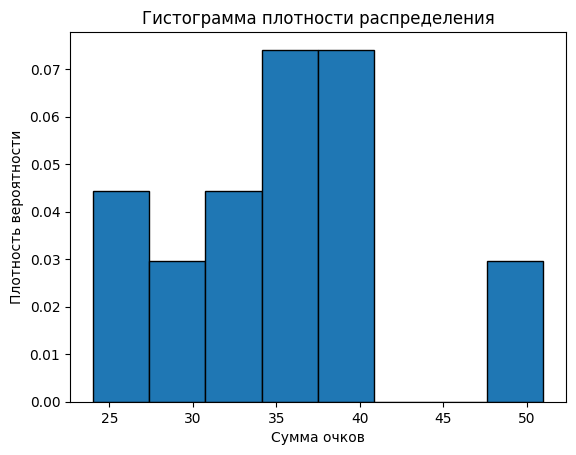

In [29]:
#гистограмма плотности распределения 

import matplotlib.pyplot as plt 

data = results
def plot_stock_price(data, figsize = [14,4]):

    fig, axs = plt.subplots(1,1)
    
    axs.hist(data, bins = 8, edgecolor='black', density=True)
    axs.set_title("Гистограмма плотности распределения")
    axs.set_xlabel("Сумма очков")
    axs.set_ylabel("Плотность вероятности")

    return axs


axs = plot_stock_price(data)
plt.show()

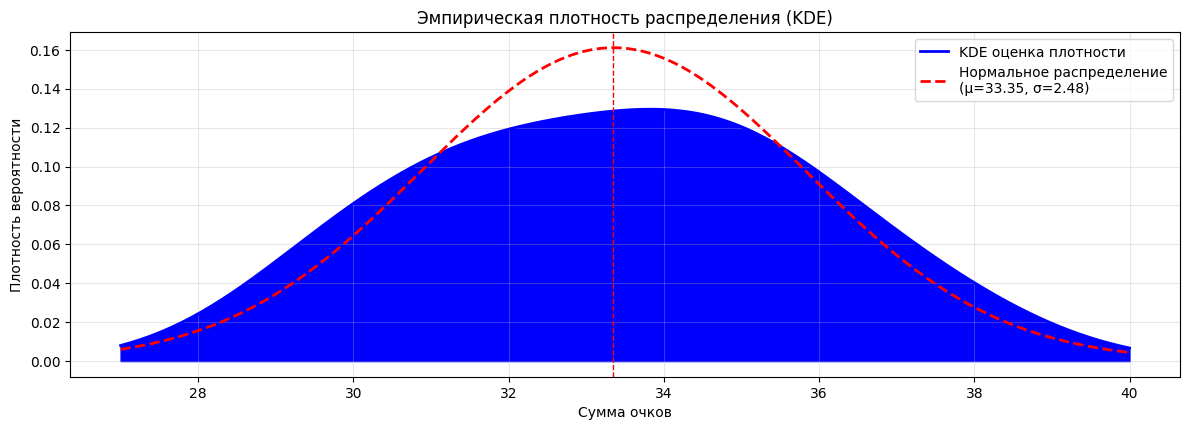

In [39]:
from scipy import stats 

plt.figure(figsize=(12, 8))


# график  KDE оценка плотности
plt.subplot(2, 1, 2)

# KDE оценка (теперь stats импортирован)
kde = stats.gaussian_kde(results)
x_range = np.linspace(min(results)-2, max(results)+2, 200)
y_kde = kde(x_range)

plt.plot(x_range, y_kde, 'b-', linewidth=2, label='KDE оценка плотности')
plt.fill_between(x_range, y_kde, color='blue')

# Нормальное распределение с выборочными параметрами
mean_estimate = np.mean(results)
std_estimate = np.std(results, ddof=1)
y_normal = stats.norm.pdf(x_range, mean_estimate, std_estimate)
plt.plot(x_range, y_normal, 'r--', linewidth=2, 
         label=f'Нормальное распределение\n(μ={mean_estimate:.2f}, σ={std_estimate:.2f})')

plt.axvline(mean_estimate, color='red', linestyle='--', linewidth=1)
plt.title("Эмпирическая плотность распределения (KDE)")
plt.xlabel("Сумма очков")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [43]:
# Точечная оценка математического ожидания (среднее арифметическое)
mean_estimate = np.mean(results)

# Точечная оценка дисперсии
# ddof=1 для несмещенной оценки (n-1 в знаменателе)
variance_estimate = np.var(results, ddof=1)

# Альтернативный расчет дисперсии
variance_estimate_alt = np.sum((results - mean_estimate)**2) / (len(results) - 1)

# Стандартное отклонение
std_estimate = np.std(results, ddof=1)

print(f"Точечная оценка математического ожидания (μ̂): {mean_estimate:.4f}")
print(f"Точечная оценка дисперсии (σ̂²): {variance_estimate:.4f}")
print(f"Точечная оценка стандартного отклонения (σ̂): {std_estimate:.4f}")
print(f"Альтернативный расчет дисперсии: {variance_estimate_alt:.4f}")

Точечная оценка математического ожидания (μ̂): 33.3500
Точечная оценка дисперсии (σ̂²): 6.1342
Точечная оценка стандартного отклонения (σ̂): 2.4767
Альтернативный расчет дисперсии: 6.1342


**Часть 2**

Повторите расчеты для выборки размера 60, 100 и 1000. Сравните значение мат.ожидания и дисперсии. Объясните различие в результатах.

In [47]:
# Проводим эксперименты для разных объемов выборки

# Теоретические значения для суммы 10 кубиков
theoretical_mean = 10 * 3.5  # 35
theoretical_variance = 10 * (35/12)  # ≈29.1667
theoretical_std = np.sqrt(theoretical_variance)  # ≈5.4006

# Функция для проведения серии экспериментов
def conduct_experiment(num_experiments):
    results = []
    for i in range(num_experiments):
        total = throw_10_dice()
        results.append(total)
    return results

# Функция для расчета статистик
def calculate_statistics(results):
    mean = np.mean(results)
    variance = np.var(results, ddof=1)  # Несмещенная оценка дисперсии
    std = np.std(results, ddof=1)
    return mean, variance, std


sample_sizes = [60, 100, 1000]
all_results = {}

for size in sample_sizes:
    print(f"\n{'='*60}")
    print(f"ЭКСПЕРИМЕНТ: выборка размера {size}")
    print(f"{'='*60}")
    
    results = conduct_experiment(size)
    all_results[size] = results
    
    # Выводим первые 20 результатов для небольших выборок
    if size <= 100:
        for i in range(min(20, size)):
            print(f"Эксперимент {i+1:2d}: Сумма = {results[i]}")
        if size > 20:
            print(f"... и еще {size-20} экспериментов")
    
    # Рассчитываем статистики
    mean, variance, std = calculate_statistics(results)
    
    print(f"\nСТАТИСТИКА ДЛЯ n={size}:")
    print(f"Выборочное среднее: {mean:.4f}")
    print(f"Выборочная дисперсия: {variance:.4f}")
    print(f"Выборочное стандартное отклонение: {std:.4f}")
    print(f"Отклонение от теоретического среднего: {abs(mean - theoretical_mean):.4f}")
    print(f"Отклонение от теоретической дисперсии: {abs(variance - theoretical_variance):.4f}")

# Сводная таблица сравнения
print(f"\n{'='*80}")
print("СВОДНАЯ ТАБЛИЦА СРАВНЕНИЯ")
print(f"{'='*80}")

print(f"{'Размер выборки':<15} {'Мат.ожидание':<15} {'Дисперсия':<15} {'Отклонение μ':<15} {'Отклонение σ²':<15} {'Отн. отклонение μ (%)':<20}")
print(f"{'-'*80}")

for size in sample_sizes:
    mean, variance, std = calculate_statistics(all_results[size])
    mean_dev = abs(mean - theoretical_mean)
    var_dev = abs(variance - theoretical_variance)
    rel_mean_dev = (mean_dev / theoretical_mean) * 100
    
    print(f"{size:<15} {mean:<15.4f} {variance:<15.4f} {mean_dev:<15.4f} {var_dev:<15.4f} {rel_mean_dev:<20.2f}")

print(f"{'Теоретическое':<15} {theoretical_mean:<15.4f} {theoretical_variance:<15.4f} {'-':<15} {'-':<15} {'-':<20}")



ЭКСПЕРИМЕНТ: выборка размера 60
Эксперимент  1: Сумма = 39
Эксперимент  2: Сумма = 39
Эксперимент  3: Сумма = 34
Эксперимент  4: Сумма = 32
Эксперимент  5: Сумма = 35
Эксперимент  6: Сумма = 29
Эксперимент  7: Сумма = 41
Эксперимент  8: Сумма = 31
Эксперимент  9: Сумма = 42
Эксперимент 10: Сумма = 33
Эксперимент 11: Сумма = 32
Эксперимент 12: Сумма = 49
Эксперимент 13: Сумма = 39
Эксперимент 14: Сумма = 30
Эксперимент 15: Сумма = 37
Эксперимент 16: Сумма = 38
Эксперимент 17: Сумма = 26
Эксперимент 18: Сумма = 44
Эксперимент 19: Сумма = 36
Эксперимент 20: Сумма = 37
... и еще 40 экспериментов

СТАТИСТИКА ДЛЯ n=60:
Выборочное среднее: 35.8000
Выборочная дисперсия: 31.1458
Выборочное стандартное отклонение: 5.5808
Отклонение от теоретического среднего: 0.8000
Отклонение от теоретической дисперсии: 1.9791

ЭКСПЕРИМЕНТ: выборка размера 100
Эксперимент  1: Сумма = 33
Эксперимент  2: Сумма = 31
Эксперимент  3: Сумма = 43
Эксперимент  4: Сумма = 33
Эксперимент  5: Сумма = 38
Эксперимент  6: С

**Вывод:**
с ростом объема выборки случайные колебания усредняются, и оценки параметров становятся точнее. Математическое ожидание сходится быстрее дисперсии, поскольку дисперсия сама по себе более изменчивая характеристика. При малых выборках (n=20) возможны значительные отклонения, тогда как при больших (n=1000) оценки практически совпадают с теоретическими значениями

**Задание 2.**

Непрерывная случайная величина имеет распределение, заданное плотностью:
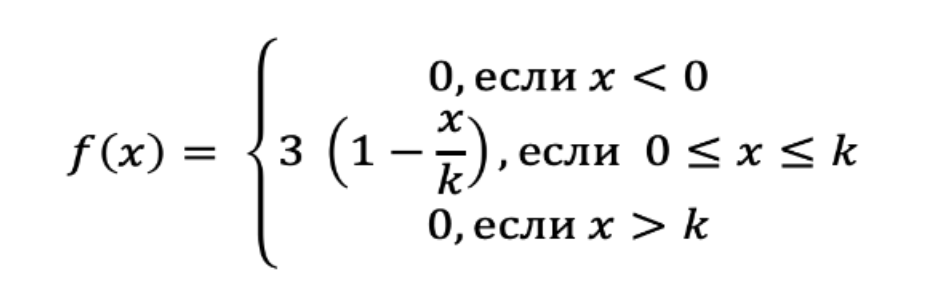

--Докажите, что если f(x) плотность распределения, то k = 2/3 (Подсказка, нужно использовать одно из свойств функции плотности вероятностей);

--Нарисуйте график плотности распределения;

--Нарисуйте график интегральной функции распределения


In [48]:
import sympy as sp

# Доказательство что k = 2/3
print("1. НАХОЖДЕНИЕ k ИЗ УСЛОВИЯ НОРМИРОВКИ")
print("=" * 50)

x = sp.Symbol('x')
k = sp.Symbol('k', positive=True)

# Задаем функцию плотности
f = 3 * (1 - x/k)

# Вычисляем интеграл от 0 до k
integral = sp.integrate(f, (x, 0, k))
print(f"∫f(x)dx от 0 до k = {integral}")

# Решаем уравнение ∫f(x)dx = 1
equation = sp.Eq(integral, 1)
k_value = sp.solve(equation, k)[0]
print(f"Решаем {integral} = 1")
print(f"k = {k_value}")
print(f"k ≈ {float(k_value):.4f}")


1. НАХОЖДЕНИЕ k ИЗ УСЛОВИЯ НОРМИРОВКИ
∫f(x)dx от 0 до k = 3*k/2
Решаем 3*k/2 = 1
k = 2/3
k ≈ 0.6667


(-0.1, 0.8)

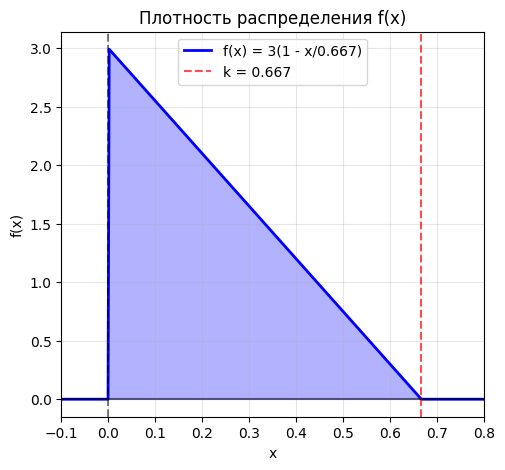

In [49]:
#Построение графика плотности распределения

k_num = float(k_value)
x_dense = np.linspace(-0.2, 1.0, 500)
y_dense = np.zeros_like(x_dense)

# Заполняем значения плотности
mask = (x_dense >= 0) & (x_dense <= k_num)
y_dense[mask] = 3 * (1 - x_dense[mask] / k_num)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_dense, y_dense, 'b-', linewidth=2, label=f'f(x) = 3(1 - x/{k_num:.3f})')
plt.fill_between(x_dense, y_dense, alpha=0.3, color='blue')
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.axvline(k_num, color='red', linestyle='--', alpha=0.7, label=f'k = {k_num:.3f}')
plt.axhline(0, color='black', linestyle='-', alpha=0.5)

plt.title('Плотность распределения f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-0.1, 0.8)

F(x) = -9*x**2/4 + 3*x для 0 ≤ x ≤ 0.667


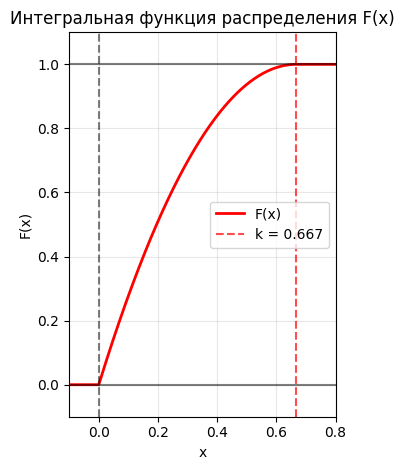

In [50]:
#Построение графика интегральной функции

# Вычисляем F(x) аналитически
F_x = 3*x - (9*x**2)/4

print(f"F(x) = {F_x} для 0 ≤ x ≤ {k_num:.3f}")

x_cdf = np.linspace(-0.2, 1.0, 500)
y_cdf = np.zeros_like(x_cdf)

# Заполняем значения функции распределения
mask_neg = x_cdf < 0
mask_mid = (x_cdf >= 0) & (x_cdf <= k_num)
mask_pos = x_cdf > k_num

y_cdf[mask_neg] = 0
y_cdf[mask_mid] = 3*x_cdf[mask_mid] - (9*x_cdf[mask_mid]**2)/4
y_cdf[mask_pos] = 1

plt.subplot(1, 2, 2)
plt.plot(x_cdf, y_cdf, 'r-', linewidth=2, label='F(x)')
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.axvline(k_num, color='red', linestyle='--', alpha=0.7, label=f'k = {k_num:.3f}')
plt.axhline(0, color='black', linestyle='-', alpha=0.5)
plt.axhline(1, color='black', linestyle='-', alpha=0.5)

plt.title('Интегральная функция распределения F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 0.8)

plt.tight_layout()
plt.show()

**Задание 3.** Проанализировать датасет цветков ирисов 

**Часть 1**

--Возьмите колонку с признаком «SepalLengthCm»

--Нарисуйте гистограмму этой колонки

--Посчитайте точечную оценку мат. ожидания и дисперсии

In [5]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


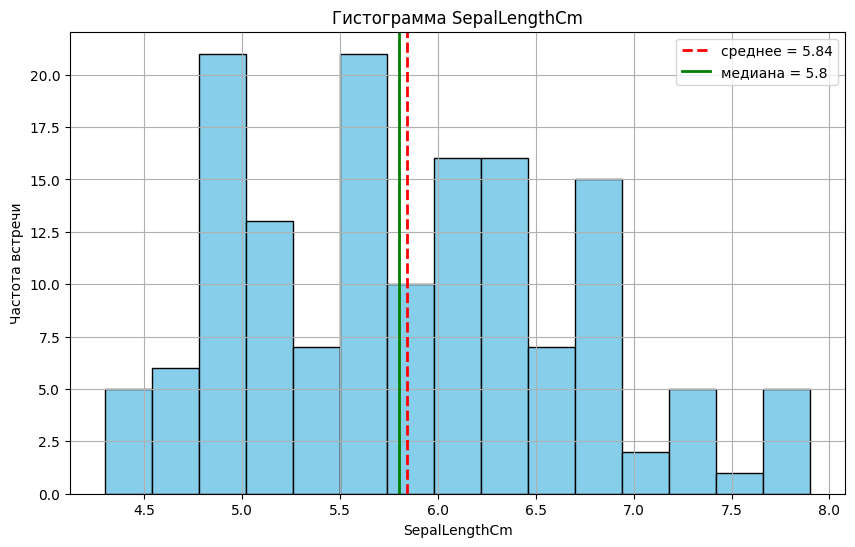

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['SepalLengthCm'], color ='skyblue', edgecolor = 'black', bins = 15)

plt.title("Гистограммa SepalLengthCm")
plt.xlabel("SepalLengthCm")
plt.ylabel("Частота встречи")


# добавление мидианы и среднего значения
mean_val = df['SepalLengthCm'].mean()
median_val = df['SepalLengthCm'].median()

plt.axvline(mean_val, color = 'red', linestyle = '--', linewidth = 2, label = f'среднее ={mean_val: .2f}' )
plt.axvline(median_val, color = 'green', linestyle = '-', linewidth = 2, label = f'медиана = {median_val}')

plt.grid()
plt.legend()
plt.show()

In [69]:
# точечная оценка мат ожидания и десперсии

sepal_length = df['SepalLengthCm']
mean_estimate = sepal_length.mean()

desp = sepal_length.var(ddof = 1) #для несмещенной оценки

print(f'Мат.ожидание: {mean_estimate} \nДисперсия: {desp}') 


Мат.ожидание: 5.843333333333334 
Дисперсия: 0.6856935123042507


**Часть 2**

--В данных присутствует три разных вида ириса. Разделите значения из признака. «SepalLengthCm» на три группы в зависимости от типа цветка (значения в колонке Species)

--Для каждой группы постройте гистограмму

--Для каждой группы посчитайте точечную оценку мат. ожидания и дисперсии

In [85]:
# разделение по группам

setosa_data = df[df['Species'] == 'Iris-setosa']['SepalLengthCm']
versicolor_data = df[df['Species'] == 'Iris-versicolor']['SepalLengthCm']
virginica_data = df[df['Species'] == 'Iris-virginica']['SepalLengthCm']

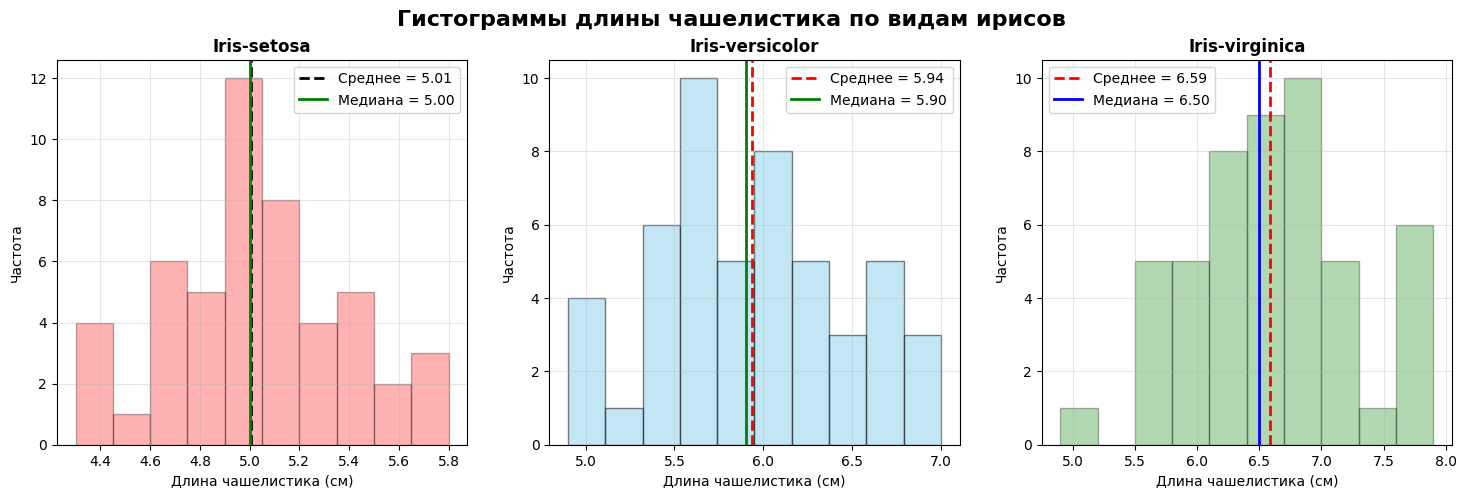

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Гистограммы длины чашелистика по видам ирисов', fontsize=16, fontweight='bold')

# Гистограмма для Iris-setosa
axes[0].hist(setosa_data, bins=10, color='red', alpha=0.3, edgecolor='black')
mean_val1 = setosa_data.mean()
median_val1 = setosa_data.median()
axes[0].axvline(mean_val1, color='black', linestyle='--', linewidth=2, label=f'Среднее = {mean_val1:.2f}')
axes[0].axvline(median_val1, color='green', linestyle='-', linewidth=2, label=f'Медиана = {median_val1:.2f}')
axes[0].set_title('Iris-setosa', fontweight='bold')
axes[0].set_xlabel('Длина чашелистика (см)')
axes[0].set_ylabel('Частота')
axes[0].grid(alpha=0.3)
axes[0].legend()

# Гистограмма для Iris-versicolor
axes[1].hist(versicolor_data, bins=10, color='skyblue', alpha=0.5, edgecolor='black')
mean_val2 = versicolor_data.mean()
median_val2 = versicolor_data.median()
axes[1].axvline(mean_val2, color='red', linestyle='--', linewidth=2, label=f'Среднее = {mean_val2:.2f}')
axes[1].axvline(median_val2, color='green', linestyle='-', linewidth=2, label=f'Медиана = {median_val2:.2f}')
axes[1].set_title('Iris-versicolor', fontweight='bold')
axes[1].set_xlabel('Длина чашелистика (см)')
axes[1].set_ylabel('Частота')
axes[1].grid(alpha=0.3)
axes[1].legend()

# Гистограмма для Iris-virginica
axes[2].hist(virginica_data, bins=10, color='green', alpha=0.3, edgecolor='black')
mean_val3 = virginica_data.mean()
median_val3 = virginica_data.median()
axes[2].axvline(mean_val3, color='red', linestyle='--', linewidth=2, label=f'Среднее = {mean_val3:.2f}')
axes[2].axvline(median_val3, color='blue', linestyle='-', linewidth=2, label=f'Медиана = {median_val3:.2f}')
axes[2].set_title('Iris-virginica', fontweight='bold')
axes[2].set_xlabel('Длина чашелистика (см)')
axes[2].set_ylabel('Частота')
axes[2].grid(alpha=0.3)
axes[2].legend()


plt.show()


In [112]:
print("ТОЧЕЧНЫЕ ОЦЕНКИ МАТЕМАТИЧЕСКОГО ОЖИДАНИЯ И ДИСПЕРСИИ")
print("=" * 65)

def calculate_estimates(data, species_name):
    """Функция для расчета точечных оценок"""
    n = len(data)
    
    # Точечная оценка математического ожидания (среднее)
    mean_estimate = data.mean()
    
    # Точечная оценка дисперсии (несмещенная)
    variance_estimate = data.var(ddof=1)
    
    # Стандартное отклонение
    std_estimate = data.std(ddof=1)
    
    # Дополнительные статистики
    min_val = data.min()
    max_val = data.max()
    range_val = max_val - min_val
    
    print(f"\n{species_name}:")
    print(f"  Количество наблюдений (n): {n}")
    print(f"  Точечная оценка мат. ожидания (μ̂): {mean_estimate:.4f} см")
    print(f"  Точечная оценка дисперсии (σ̂²): {variance_estimate:.4f}")
    print(f"  Стандартное отклонение (σ̂): {std_estimate:.4f} см")
    print(f"  Минимальное значение: {min_val:.2f} см")
    print(f"  Максимальное значение: {max_val:.2f} см")
    print(f"  Размах: {range_val:.2f} см")
    
    return mean_estimate, variance_estimate, std_estimate

# Расчет для каждой группы
mean_setosa, var_setosa, std_setosa = calculate_estimates(setosa_data, "Iris-setosa")
mean_versicolor, var_versicolor, std_versicolor = calculate_estimates(versicolor_data, "Iris-versicolor")
mean_virginica, var_virginica, std_virginica = calculate_estimates(virginica_data, "Iris-virginica")

# СРАВНИТЕЛЬНАЯ ТАБЛИЦА
print("\n" + "=" * 80)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА ТОЧЕЧНЫХ ОЦЕНОК")
print("=" * 80)
print(f"{'Вид ириса':<20} {'n':<6} {'Мат. ожидание':<14} {'Дисперсия':<12} {'Ст. отклонение':<15} {'Размах':<10}")
print("-" * 80)
print(f"{'Iris-setosa':<20} {len(setosa_data):<6} {mean_setosa:<14.4f} {var_setosa:<12.4f} {std_setosa:<15.4f} {setosa_data.max()-setosa_data.min():<10.2f}")
print(f"{'Iris-versicolor':<20} {len(versicolor_data):<6} {mean_versicolor:<14.4f} {var_versicolor:<12.4f} {std_versicolor:<15.4f} {versicolor_data.max()-versicolor_data.min():<10.2f}")
print(f"{'Iris-virginica':<20} {len(virginica_data):<6} {mean_virginica:<14.4f} {var_virginica:<12.4f} {std_virginica:<15.4f} {virginica_data.max()-virginica_data.min():<10.2f}")

ТОЧЕЧНЫЕ ОЦЕНКИ МАТЕМАТИЧЕСКОГО ОЖИДАНИЯ И ДИСПЕРСИИ

Iris-setosa:
  Количество наблюдений (n): 50
  Точечная оценка мат. ожидания (μ̂): 5.0060 см
  Точечная оценка дисперсии (σ̂²): 0.1242
  Стандартное отклонение (σ̂): 0.3525 см
  Минимальное значение: 4.30 см
  Максимальное значение: 5.80 см
  Размах: 1.50 см

Iris-versicolor:
  Количество наблюдений (n): 50
  Точечная оценка мат. ожидания (μ̂): 5.9360 см
  Точечная оценка дисперсии (σ̂²): 0.2664
  Стандартное отклонение (σ̂): 0.5162 см
  Минимальное значение: 4.90 см
  Максимальное значение: 7.00 см
  Размах: 2.10 см

Iris-virginica:
  Количество наблюдений (n): 50
  Точечная оценка мат. ожидания (μ̂): 6.5880 см
  Точечная оценка дисперсии (σ̂²): 0.4043
  Стандартное отклонение (σ̂): 0.6359 см
  Минимальное значение: 4.90 см
  Максимальное значение: 7.90 см
  Размах: 3.00 см

СРАВНИТЕЛЬНАЯ ТАБЛИЦА ТОЧЕЧНЫХ ОЦЕНОК
Вид ириса            n      Мат. ожидание  Дисперсия    Ст. отклонение  Размах    
--------------------------------------